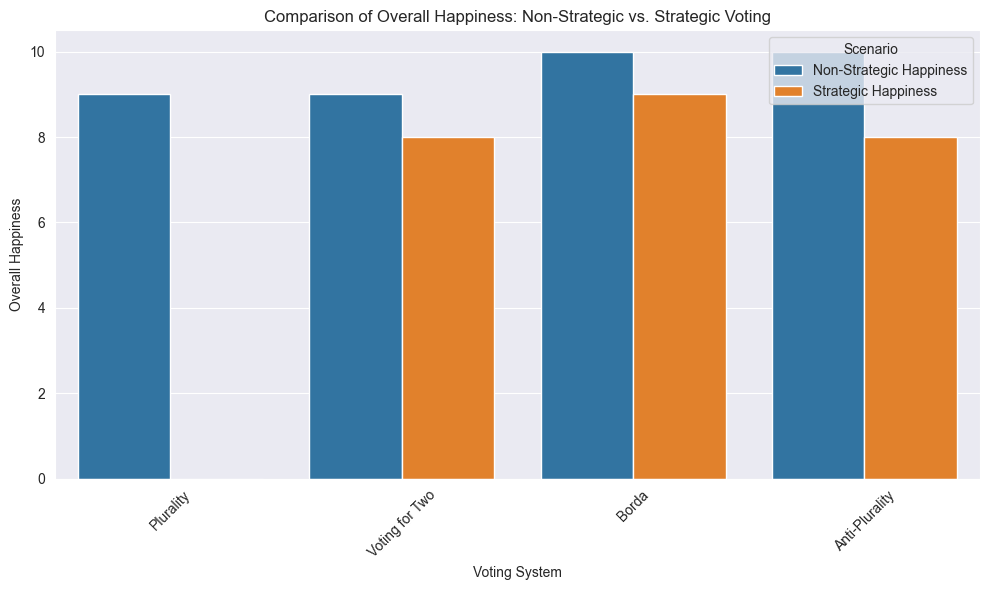

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'output.json'
with open(file_path, 'r') as file:
    data = json.load(file)

voting_systems = ['plurality', 'voting_for_two', 'borda', 'anti_plurality']
non_strategic_happiness = []
strategic_happiness = []

for schema in voting_systems:
    non_strategic_happiness.append(data[schema]['non_strategic_overall_happiness'])
    # Calculate strategic happiness as the average of overall happiness in strategic scenarios
    if data[schema]['voters']:
        strategic_happiness_avg = sum(item['overall_happiness'] for sublist in data[schema]['voters'] for item in sublist) / max(len([item for sublist in data[schema]['voters'] for item in sublist]), 1)
    else:
        strategic_happiness_avg = data[schema]['non_strategic_overall_happiness']  # Use non-strategic if no strategic data
    strategic_happiness.append(strategic_happiness_avg)

df = pd.DataFrame({
    'Voting Schema': ['Plurality', 'Voting for Two', 'Borda', 'Anti-Plurality'],
    'Non-Strategic Happiness': non_strategic_happiness,
    'Strategic Happiness': strategic_happiness
})

df_melted = df.melt(id_vars=["Voting Schema"], var_name="Type", value_name="Overall Happiness")

plt.figure(figsize=(10, 6))
sns.barplot(x='Voting Schema', y='Overall Happiness', hue='Type', data=df_melted)
plt.title('Comparison of Overall Happiness: Non-Strategic vs. Strategic Voting')
plt.ylabel('Overall Happiness')
plt.xlabel('Voting Schema')
plt.xticks(rotation=45)
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()